# TASK 3 - Exploratory Data Analysis - Retail
## Graduate Rotational Internship Program (GRIP) The Spark Foundation
## Data Science and Business Analytics Internship
### Author: Claudia Jocelyn Sutanto

The purpose is to perform Exploratory Data Analysis on retail dataset. 

## Import Libraries and Dataset

In [178]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [179]:
#load  dataset
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Preliminary Analysis and Preparation Data

In [180]:
df.shape

(9994, 13)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [182]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<b> There are no missing values </b>

In [183]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

<b> From above information, it shows the unique number in each columns. The Country column should be removed because it is unnecessary and the only country name in the rows is United States.</b>

In [184]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [185]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [186]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [187]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [188]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [189]:
#prove the only country is United States
#df.groupby(["Country"]).count()
df["Country"].where(df["Country"] == "United States").count()

9994

In [190]:
df = df.drop(["Country"], axis=1)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [191]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Find and removed duplicate rows

In [192]:
df.duplicated().sum()

17

<b> There are 17 rows contain the same information.</b>

In [193]:
#a shows the 17 rows while b shows 34 rows with the same information
#a = df[df.duplicated()]
#b = df[df.duplicated(keep = False)]

In [194]:
#new dataframe called data that already removed the same rows.
data = df.drop_duplicates(keep = "first")
data

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [195]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


<b> Detect sales outliers using Z score </b>

In [196]:
df["Zscore"] = (df["Sales"] - df["Sales"].mean())/df["Sales"].std()
df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Zscore
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.051508
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.805593
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,-0.345350
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1.167630
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,-0.332919
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,-0.328298
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,-0.221258
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932,0.046078
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,-0.321315


<b> If the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers. </b>

In [197]:
#df_outliers=df[df['Zscore']>=3]
#df_outliers

In [198]:
new_df= df[df['Zscore']<3]
new_df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Zscore
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.051508
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.805593
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,-0.345350
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1.167630
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,-0.332919
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,-0.328298
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,-0.221258
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932,0.046078
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,-0.321315


In [199]:
#Remove postal code column because I won't use it.
new_df = new_df.drop(["Postal Code"], axis=1)
new_df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Zscore
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.051508
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.805593
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,-0.345350
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1.167630
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,-0.332919


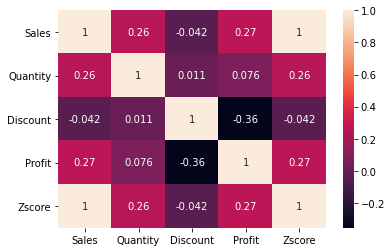

In [200]:
sns.heatmap(new_df.corr(), annot=True)

<b> According to the graph above, discount is negatively related to sales and profit, while profit and sales are moderately related. </b>

## Visualizing

### Distribution

Text(0.5, 1.0, 'Sales Distribution')

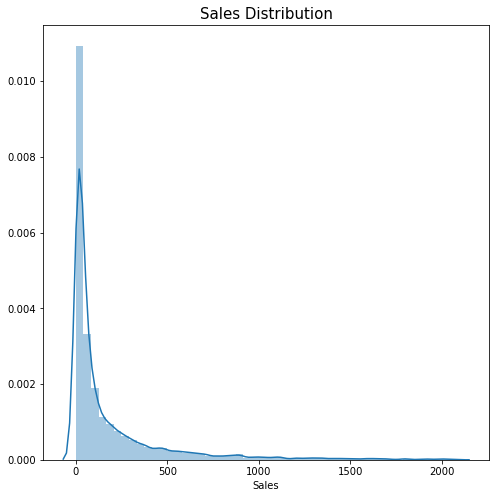

In [201]:
fig=plt.subplots(figsize=(8,8))
sns.distplot(new_df['Sales'])
plt.title('Sales Distribution',fontsize=15)

Text(0.5, 1.0, 'Quantity Distribution')

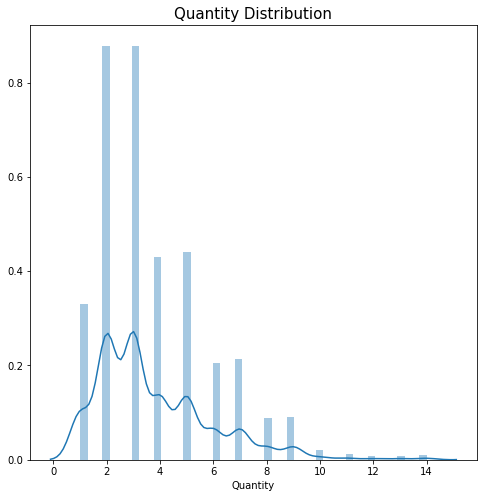

In [202]:
fig=plt.subplots(figsize=(8,8))
sns.distplot(new_df['Quantity'])
plt.title('Quantity Distribution',fontsize=15)

Text(0.5, 1.0, 'Discount Distribution')

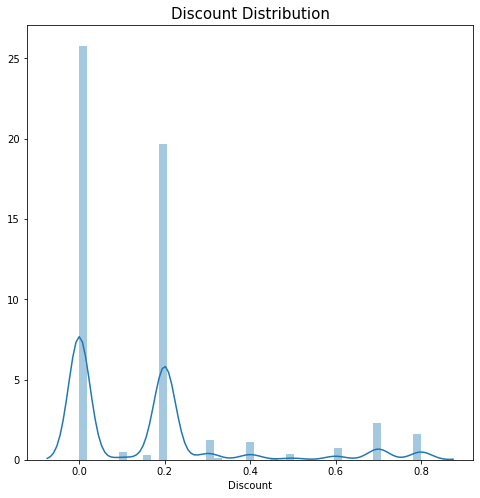

In [203]:
fig=plt.subplots(figsize=(8,8))
sns.distplot(new_df['Discount'])
plt.title('Discount Distribution',fontsize=15)

Text(0.5, 1.0, 'Profit Distribution')

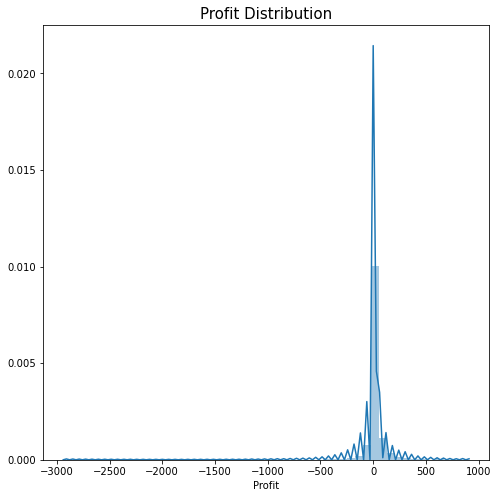

In [204]:
fig=plt.subplots(figsize=(8,8))
sns.distplot(new_df['Profit'])
plt.title('Profit Distribution',fontsize=15)

### Count Plots

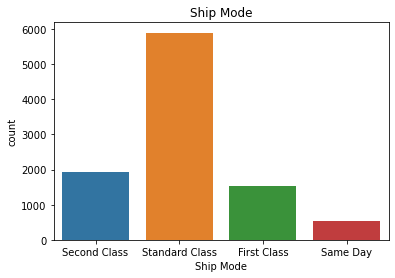

In [205]:
sns.countplot(new_df["Ship Mode"])
plt.title("Ship Mode")
plt.show()

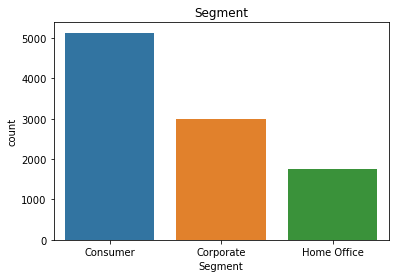

In [206]:
sns.countplot(new_df["Segment"])
plt.title("Segment")
plt.show()

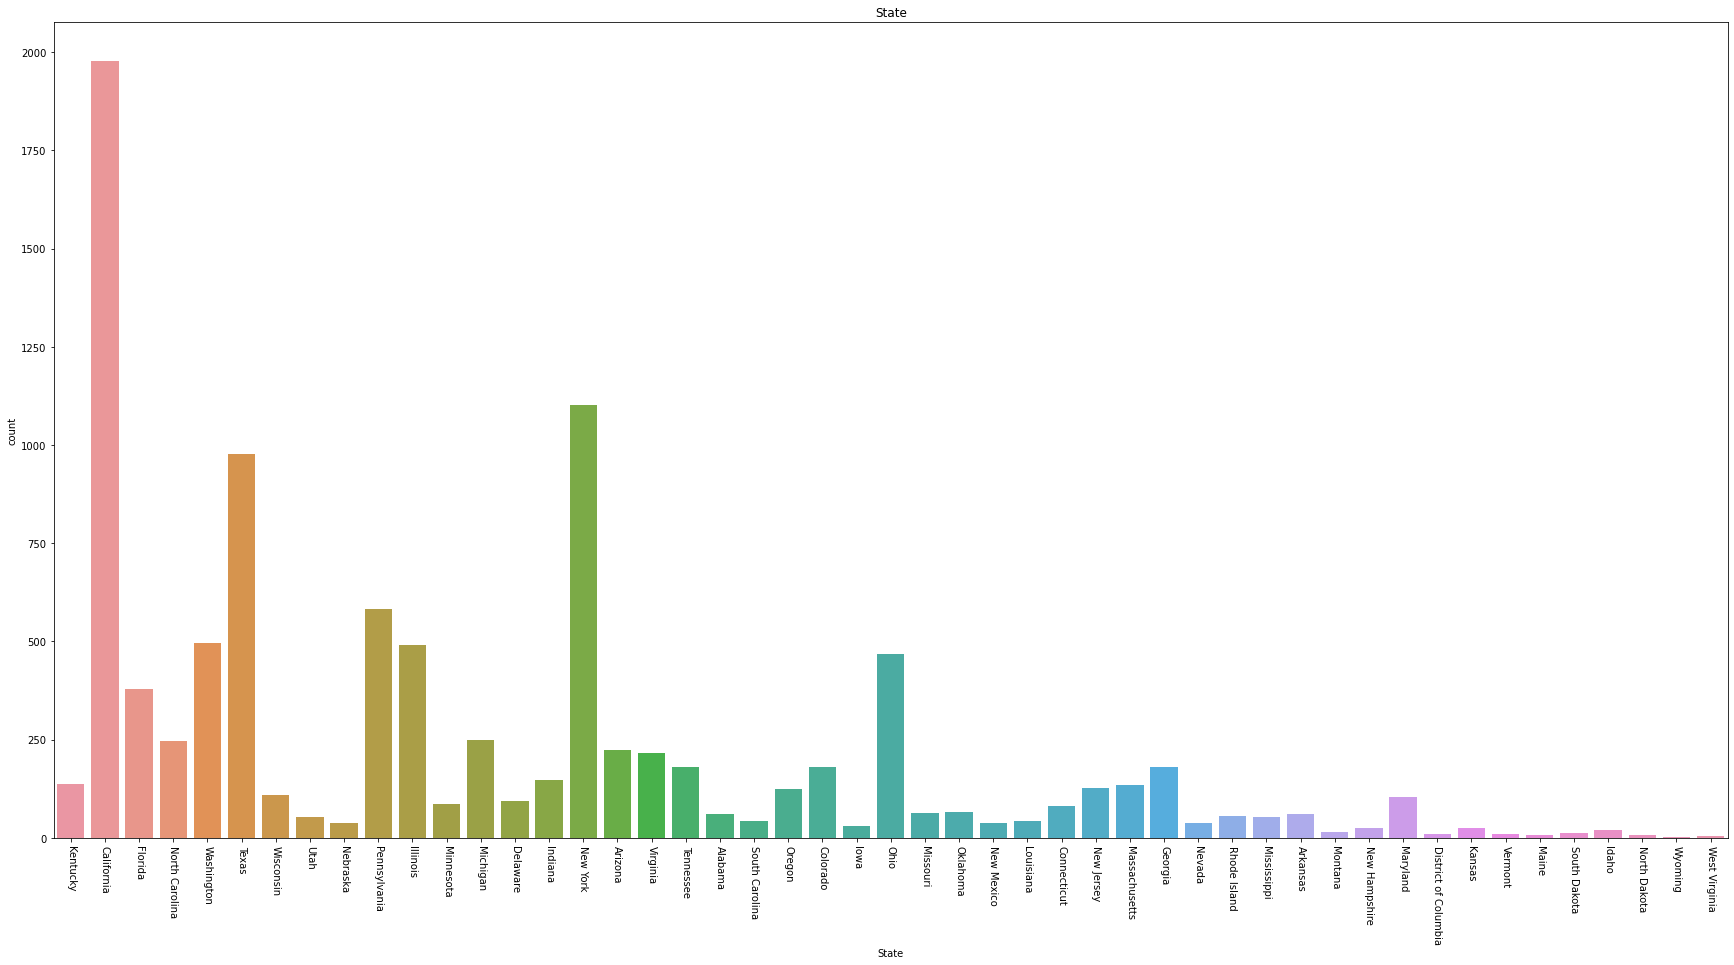

In [207]:
fig=plt.subplots(figsize=(30,15))
sns.countplot(new_df["State"])
plt.xticks(rotation = 270)
plt.title("State")
plt.show()

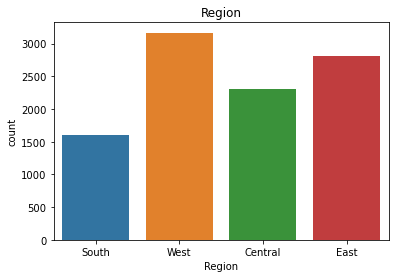

In [208]:
sns.countplot(new_df["Region"])
plt.title("Region")
plt.show()

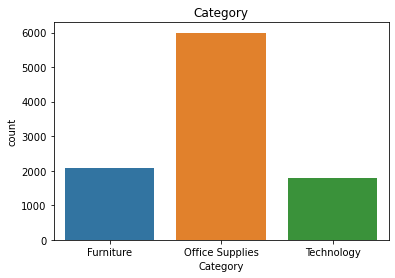

In [209]:
sns.countplot(new_df["Category"])
plt.title("Category")
plt.show()

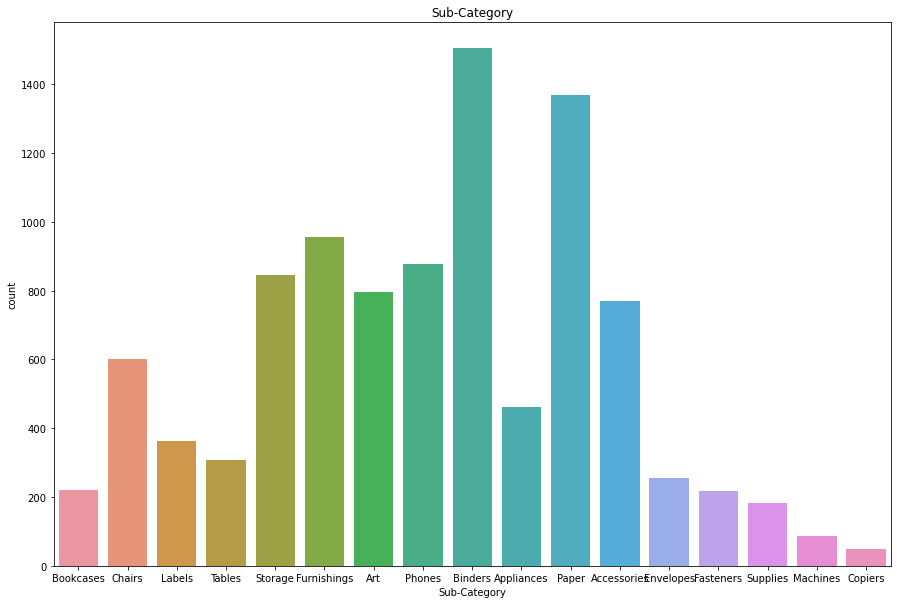

In [210]:
fig=plt.subplots(figsize=(15,10))
sns.countplot(new_df["Sub-Category"])
plt.title("Sub-Category")
plt.show()

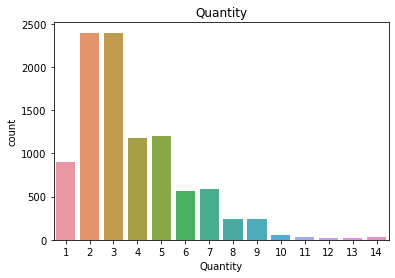

In [211]:
sns.countplot(new_df["Quantity"])
plt.title("Quantity")
plt.show()

<b> According to the plot, most people tend to buy around 2-3 amounts of products for each purchase. </b>

<b> According to the graphs above, people prefer standard class as a shipping mode, and the consumer segment makes the most purchases. The majority of purchases are made by the state of California. The West region makes the most purchases. The office supply category is the most popular, with binder as a sub-category. 
    
   On the other hand, the least preferred ship mode is on the same day. The home office segment makes the fewest purchases. People in Wyoming make the fewest purchases. The South region also has the fewest purchases. The technology category, which includes the subcategory copiers, has the fewest purchases. </b>

### Pair Plots

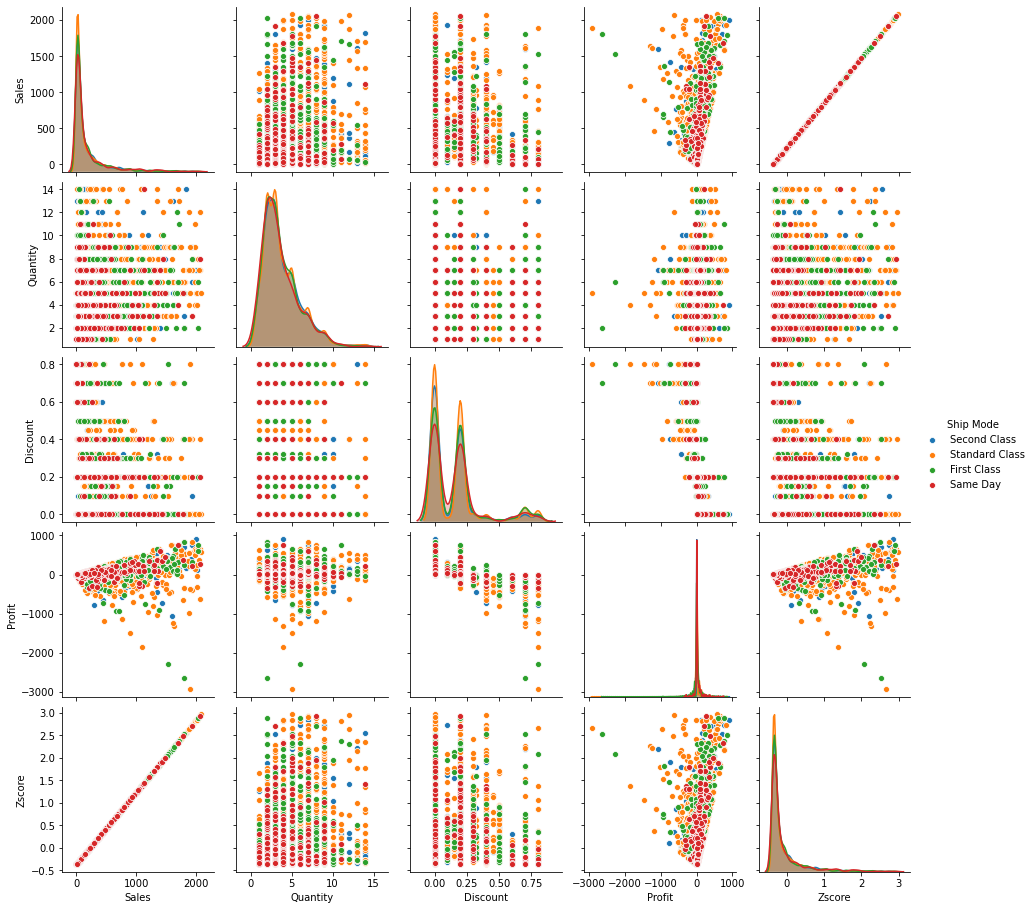

In [212]:
sns.pairplot(new_df, hue="Ship Mode")

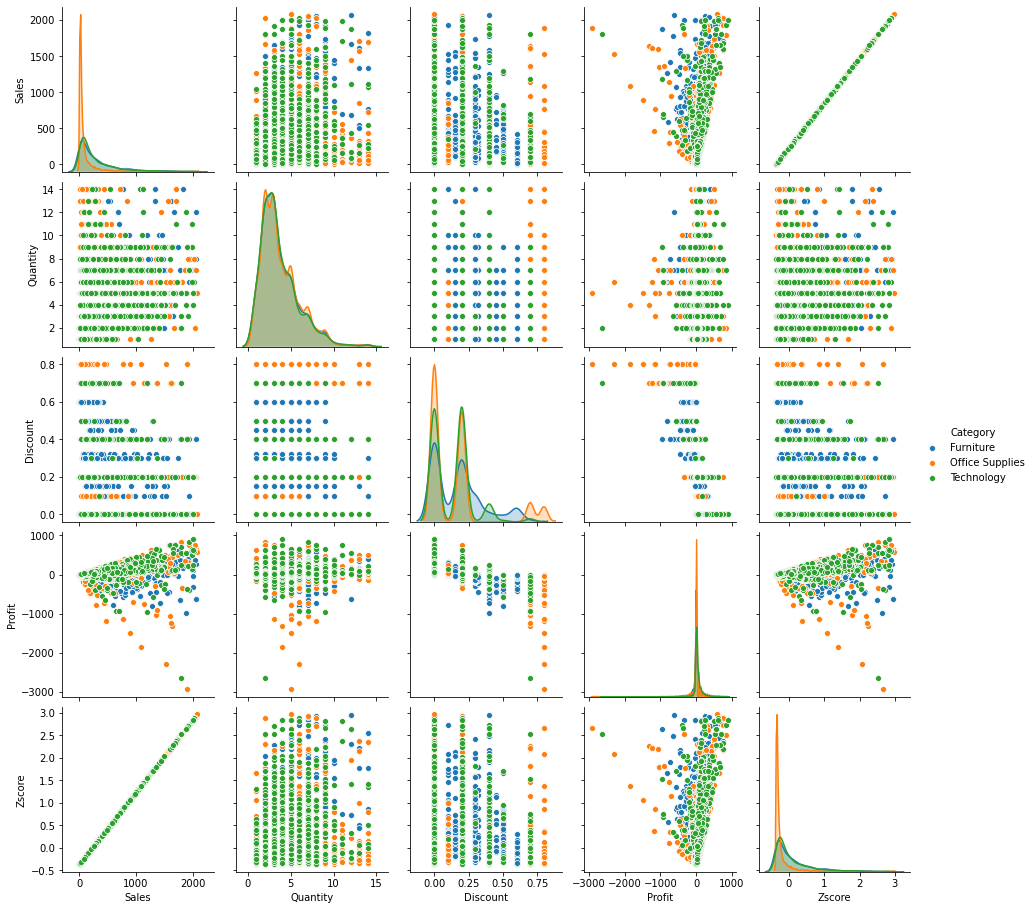

In [213]:
sns.pairplot(new_df, hue="Category")

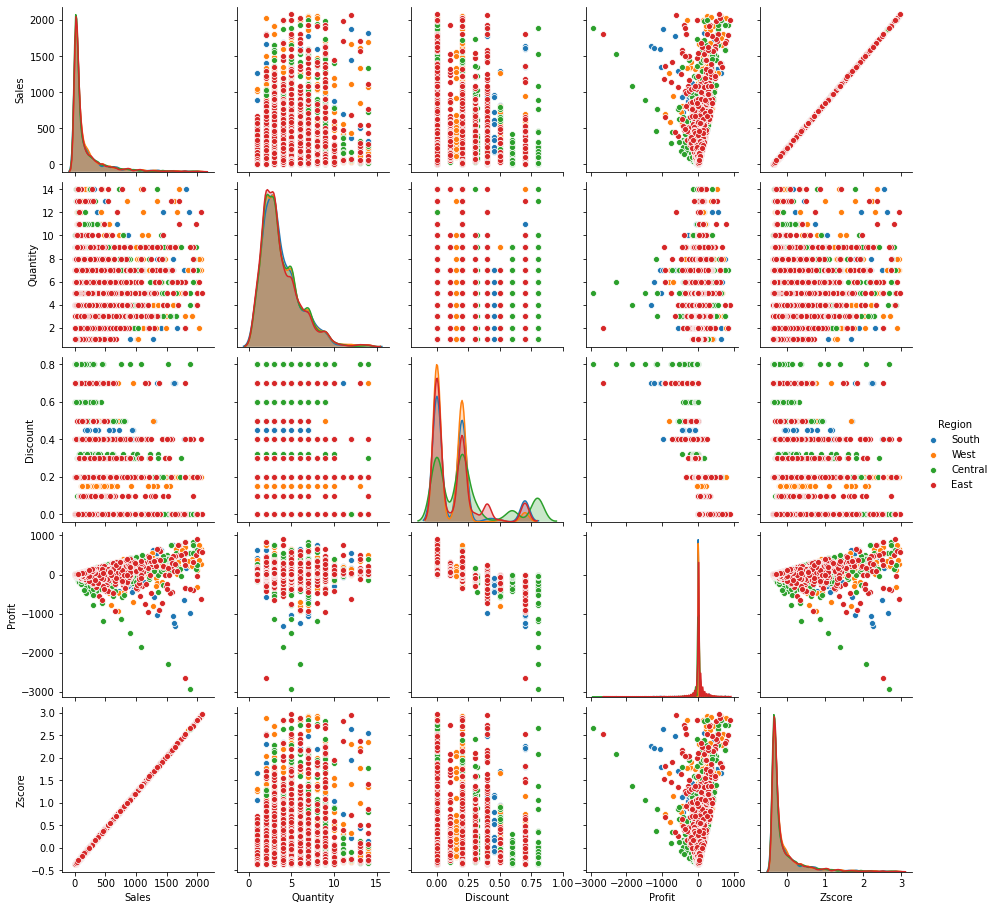

In [214]:
sns.pairplot(new_df, hue="Region")

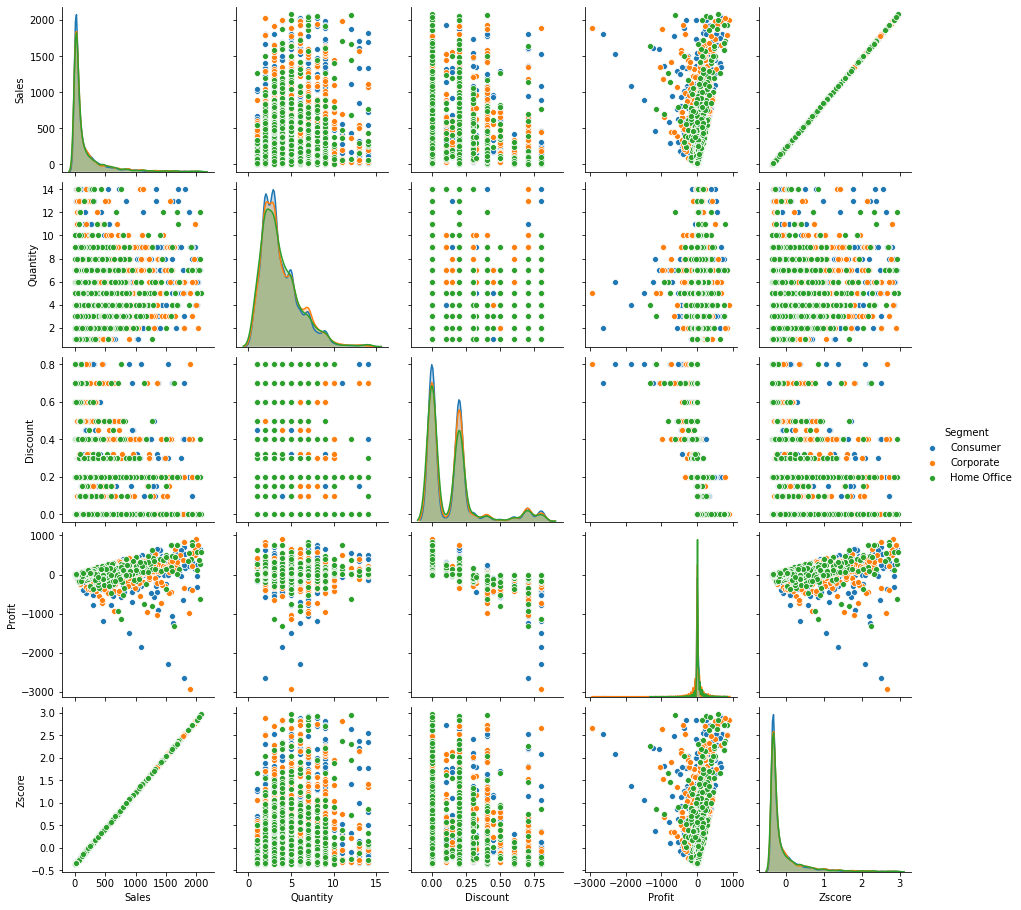

In [215]:
sns.pairplot(new_df, hue="Segment")

### Calculate Information

Calculation information on Sales of each states.

In [216]:
df1 = new_df.groupby("State")["Sales"].agg(["sum","mean","min","max","count","median","std","var"])
df1

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,16470.6400,274.510667,3.620,1819.860,60,66.960,418.811913,175403.418511
Arizona,35282.0010,157.508933,1.408,1879.960,224,61.512,249.710692,62355.429472
Arkansas,11678.1300,194.635500,4.300,1793.980,60,54.420,316.405669,100112.547642
California,373740.2915,189.044154,0.990,2054.272,1977,59.520,305.390449,93263.326389
Colorado,29558.1330,163.304602,1.080,1983.968,181,49.616,272.686480,74357.916155
Connecticut,13384.3570,163.223866,3.520,1133.350,82,50.000,251.732268,63369.134544
Delaware,14016.7690,149.114564,3.380,1268.820,94,62.745,221.055675,48865.611354
District of Columbia,2865.0200,286.502000,9.640,1379.920,10,35.800,547.419707,299668.335573
Florida,59663.4120,157.008979,1.167,1801.632,380,41.400,267.986629,71816.833205


Calculation information on Profit of each states.

In [217]:
df2 = new_df.groupby("State")["Profit"].agg(["sum","mean","min","max","count","median","std","var"])
df2

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,4327.6253,72.127088,0.0000,527.9840,60,16.21350,114.710050,13158.395525
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,63533.4489,32.136292,-325.5720,682.5168,1977,12.91290,66.875351,4472.312609
Colorado,-3127.8779,-17.281093,-938.2800,247.9960,181,3.18420,116.677938,13613.741185
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,4145.1201,44.097022,-48.7839,390.9770,94,18.50400,66.376002,4405.773698
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-1915.8155,-5.041620,-1031.5385,311.9948,380,2.93850,84.856973,7200.705909


<ipython-input-218-14ce5922848c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df.groupby(['State'])['Profit','Sales'].agg(['sum'])


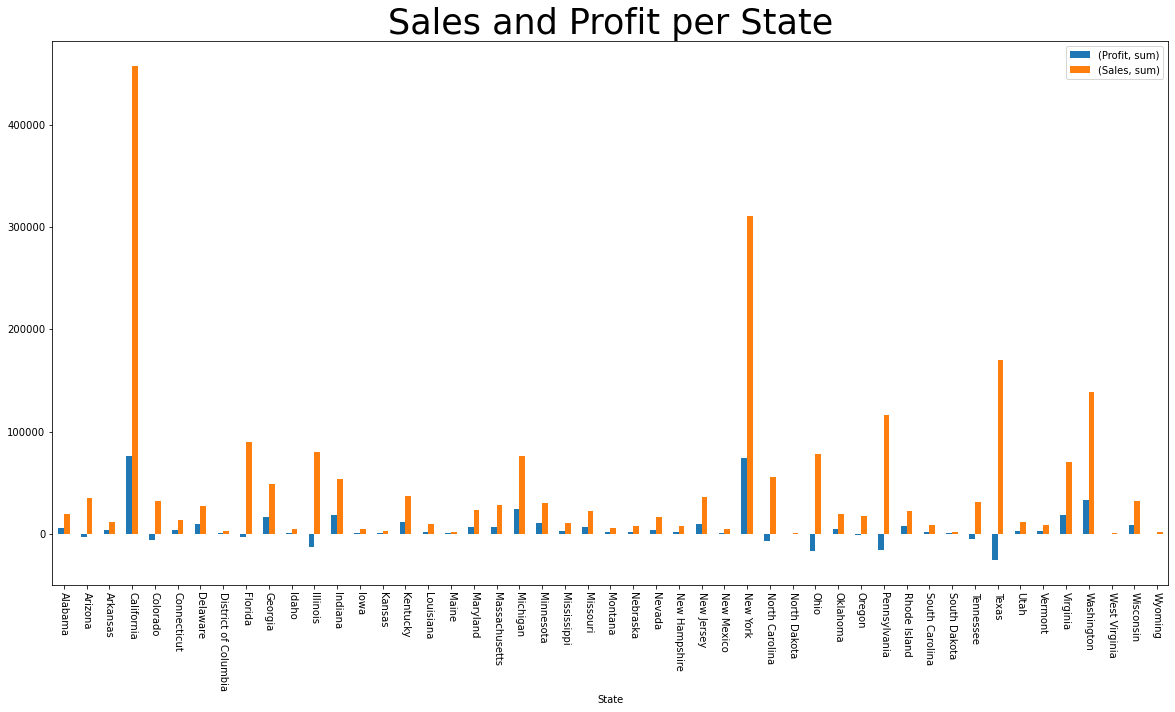

In [218]:
df3 = df.groupby(['State'])['Profit','Sales'].agg(['sum'])
df3.plot.bar(rot=0,figsize=(20,10))

plt.title('Sales and Profit per State',fontsize=35)
plt.xticks(rotation = 270)
plt.legend()
plt.show()

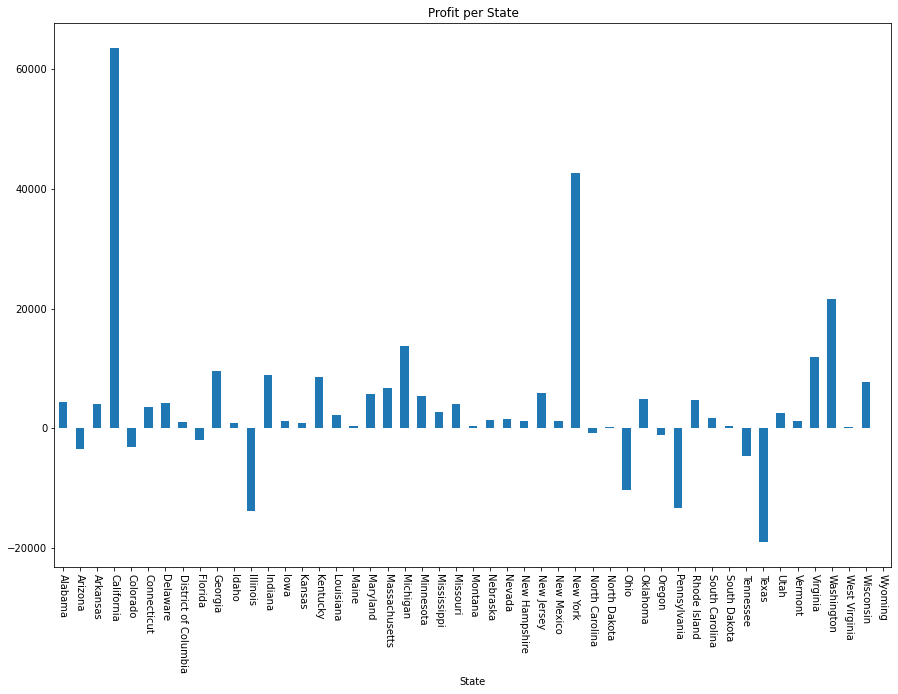

In [219]:
df2['sum'].plot.bar(figsize=(15,10))
plt.title('Profit per State')
plt.xticks(rotation = 270)
plt.show()

<b> Question: As a business manager, try to find out the weak areas where you can work to make more profit. </b>

The most profitable area is California State. On the other hand, the most unprofitable area is Texas.

<b> Question: What all business problems you can derive by exploring the data? </b>

From the data, we can found business problems such as performance of the company, reputation of each branch, customer preference, and others.